In [2]:
import numpy as np
import matplotlib.pyplot as plt


def global_alignement(seq1, seq2, score_mat):
    n = len(seq1)
    m = len(seq2)
    seq1 = list(seq1)

    seq2 = list(seq2)
    gap = int(score_mat[1][2])
    arr = np.zeros((m+1, n+1), dtype=np.int32)
    arr[0, 1:n+1] = [gap*i for i in range(1, n+1)]
    arr[1:m+1, 0] = [gap*i for i in range(1, m+1)]

    for i in range(1, m+1):
        for j in range(1, n+1):

            row_index = np.where(score_mat[0, :] == seq2[i-1])[0][0]
            column_index = np.where(score_mat[:, 0] == seq1[j-1])[0][0]

            arr[i][j] = np.amax([int(score_mat[row_index][column_index]) +
                                 arr[i-1][j-1], arr[i-1][j]+gap, arr[i][j-1]+gap])

    return arr


blosum62 = np.array([

    ["", "-",  "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L",
        "K", "M", "F", "P", "S", "T", "W", "Y", "V", "B", "Z", "X"],
    ["-", 1, -4,  -4, -4, -4, -4, -4, -4, -4, -4, -4, -
        4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
    ["A",  -4,  4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -
        1, -1, -1, -2, -1,  1,  0, -3, -2,  0, -2, -1,  0],
    ["R",  -4, -1,  5,  0, -2, -3,  1,  0, -2,  0, -3, -
        2,  2, -1, -3, -2, -1, -1, -3, -2, -3, -1,  0, -1],
    ["N", -4, -2,  0,  6,  1, -3,  0,  0,  0,  1, -3, -3,
        0, -2, -3, -2,  1,  0, -4, -2, -3,  3,  0, -1],
    ["D",  -4, -2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -
        4, -1, -3, -3, -1,  0, -1, -4, -3, -3,  4,  1, -1],
    ["C",  -4,  0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -
        1, -3, -1, -2, -3, -1, -1, -2, -2, -1, -3, -3, -2],
    ["Q",  -4, -1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -
        2,  1,  0, -3, -1,  0, -1, -2, -1, -2,  0,  3, -1],
    ["E",  -4, -1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -
        3,  1, -2, -3, -1,  0, -1, -3, -2, -2,  1,  4, -1],
    ["G",  -4,  0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -
        4, -2, -3, -3, -2,  0, -2, -2, -3, -3, -1, -2, -1],
    ["H",  -4, -2, 0, 1, -1, -3,  0,  0, -2,  8, -3, -
        3, -1, -2, -1, -2, -1, -2, -2,  2, -3,  0,  0, -1],
    ["I",  -4, -1, -3, -3, -3, -1, -3, -3, -4, -3,  4,
        2, -3,  1,  0, -3, -2, -1, -3, -1,  3, -3, -3, -1],
    ["L",  -4, -1, -2, -3, -4, -1, -2, -3, -4, -3,  2,
        4, -2,  2,  0, -3, -2, -1, -2, -1,  1, -4, -3, -1],
    ["K",  -4, -1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -
        2,  5, -1, -3, -1,  0, -1, -3, -2, -2,  0,  1, -1],
    ["M",  -4, -1, -1, -2, -3, -1,  0, -2, -3, -2,  1,
        2, -1,  5,  0, -2, -1, -1, -1, -1,  1, -3, -1, -1],
    ["F",  -4, -2, -3, -3, -3, -2, -3, -3, -3, -1,  0,
        0, -3,  0,  6, -4, -2, -2,  1,  3, -1, -3, -3, -1],
    ["P",  -4, -1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -
        3, -1, -2, -4,  7, -1, -1, -4, -3, -2, -2, -1, -2],
    ["S",  -4,  1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -
        2,  0, -1, -2, -1,  4,  1, -3, -2, -2,  0, 0,  0],
    ["T",  -4,  0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -
        1, -1, -1, -2, -1,  1,  5, -2, -2,  0, -1, -1,  0],
    ["W",  -4, -3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -
        2, -3, -1,  1, -4, -3, -2, 11,  2, -3, -4, -3, -2],
    ["Y", -4, -2, -2, -2, -3, -2, -1, -2, -3,  2, -1, -
        1, -2, -1,  3, -3, -2, -2,  2,  7, -1, -3, -2, -1],
    ["V",  -4,  0, -3, -3, -3, -1, -2, -2, -3, -3,  3,
        1, -2,  1, -1, -2, -2,  0, -3, -1,  4, -3, -2, -1],
    ["B",  -4, -2, -1,  3,  4, -3,  0,  1, -1,  0, -3, -
        4,  0, -3, -3, -2,  0, -1, -4, -3, -3,  4,  1, -1],
    ["Z",  -4, -1,  0,  0,  1, -3,  3,  4, -2,  0, -3, -
        3,  1, -1, -3, -1,  0, -1, -3, -2, -2,  1,  4, -1],
    ["X",  -4, 0, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2,  0,  0, -2, -1, -1, -1, -1, -1]])


def score(arr):
    n = arr.shape[0]
    m = arr.shape[1]
    return arr[n-1][m-1]


def distance_mat(n, sequences):
    arr = np.zeros((n, n))
    i = 0
    for i in range(n):
        for j in range(n):
            if (i != j):
                arr[i][j] = score(global_alignement(
                    sequences[i], sequences[j], blosum62))
    return np.array(arr)


def Q(n, dist_mat):
    q_mat = np.zeros((n, n))
    for i in range(dist_mat.shape[0]):
        for j in range(dist_mat.shape[1]):
            if (i != j):
                q_mat[i][j] = (n-2)*dist_mat[i][j]-(np.sum([dist_mat[i, k]
                                                            for k in range(n)]))-(np.sum([dist_mat[j][k] for k in range(n)]))
    index = np.argmin(q_mat)
    row = index//n
    col = index % n
    min_q = q_mat[row][col]

    return row, col, min_q


def branch_length(row, col, distance_mat, n):
    d1 = 1/2*distance_mat[row][col]+(1/(2*(n-2)))*(np.sum([distance_mat[row, k]
                                                           for k in range(n)])-np.sum([distance_mat[col, k] for k in range(n)]))
    d2 = distance_mat[row][col]-d1
    return d1, d2


def dist_mat_update(row, col, dist_mat, n):

    new_dist_mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i != j and ((i == row and j in [k for k in range(n)]))):

                new_dist_mat[i][j] = 1/2 * \
                    (dist_mat[row][j+1]+dist_mat[col][j+1]-dist_mat[row][col])
            elif (i != j and (j == row and i in [k for k in range(n)])):
                new_dist_mat[i][j] = 1/2 * \
                    (dist_mat[row][i+1]+dist_mat[col][i+1]-dist_mat[row][col])
            elif (i != j):
                new_dist_mat[i][j] = dist_mat[i+1][j+1]
    return new_dist_mat


s1 = "ACCCGACCACCGGGCCTTGTAAACT"
s2 = "ACGCTATGTGTCGTATTGTAAT"
s3 = "ACGATGACAGGGCTTGTATCAT"
s4 = "TTCATGACCGGCTTATACTACT"
s5 = "TTCGCTACCTGATCGTACGGTATAT"

n = 4
seq = ["a", "c", "g", "t"]
m_seq = ["a", "c", "g", "t"]
sequences = [s1, s2, s3, s4, s5]


a = {}

distance_mat = distance_mat(n, sequences)


while n != 2:
    row, col, min_q = Q(n, distance_mat)

    d1, d2 = branch_length(row, col, distance_mat, n)

    a[m_seq[row]] = (m_seq[col], d1)
    a[m_seq[col]] = (m_seq[row], d2)

    x = m_seq.pop(row)
    y = m_seq.pop(col-1)

    m_seq.insert(row, x+y)

    n = n-1
    distance_mat = dist_mat_update(row, col, distance_mat, n)

# python dict for each key there is the connected element and the wieght
print("NJ: ", a)



NJ:  {'a': ('c', 36.0), 'c': ('a', 11.0), 'ac': ('g', 1.0), 'g': ('ac', 41.0)}


<h2>Global aligenemnt using claustal</h2>

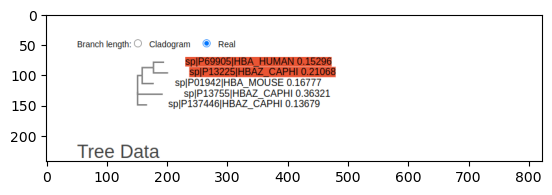

In [3]:
plt.imshow(plt.imread("./global_alignement.png"))

<h2>Phylogenetic Tree</h2>

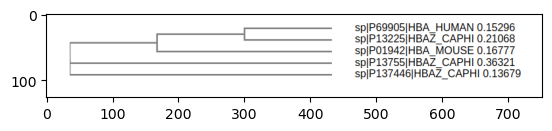

In [4]:
plt.imshow(plt.imread("./tree.png"))